In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import binomial
from numpy.random import normal
from math import factorial
from scipy.stats import binom
from scipy.stats import norm
from matplotlib import cm
#from mpl_toolkits.mplot3d import Axes3d

/home/jeffersonrl/anaconda3/envs/jeff3.9/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Secuencia de eventos tipo Bernoulli

\begin{equation}
P(k,n;p)=\begin{pmatrix} n\\k\end{pmatrix}p^k(1-p)^{n-k}=\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation}

In [2]:
def my_binomial(k,n,p):
    return factorial(n)/(factorial(k)*factorial(n-k))*pow(p,k)*pow(1-p,n-k)

In [3]:
#2 caras con 3 lanzamientos con una probabilidad equilibrada de 0.5
my_binomial(3,5,0.5) #3/8

0.3125

In [6]:
#Utilizando scipy
dist = binom(3,0.5)
#Densidad de probabilidad
dist.pmf(2)

0.375

## Validación de ejercicio para una distribución acumulada

\begin{equation}
P(k\leq 2,n=3,p=1/2)=\sum_{k=0}^{2}\left[ \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k} \right]=\frac{7}{8}
\end{equation}

In [8]:
#Función de densidad acumulada
dist.cdf(2) #Mide dos o menos caras
#7/8

0.875

## Simulaciones de secuencias con generadores aleatorias

- Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [18]:
# simulación con 100 lanzamientos de moneda equilibrada
# de manera aleatoria
p = 0.5
n = 3
binomial(n,p)

2

In [19]:
arr = []

for _ in range(100):
    arr.append(binomial(n,p))

In [25]:
def plot_hist(num_trials):
    values = [0,1,2,3]
    arr = []
    for _ in range(100):
        arr.append(binomial(n,p))
    sim = np.unique(arr,return_counts=True)[1]/len(arr)
    teorica = [binom(3,0.5).pmf(k) for k in values]
    plt.bar(values, sim, color='red')
    plt.bar(values, teorica, alpha=0.5,color='blue')
    plt.title('{} experimentos'.format(num_trials))
    plt.show()
    

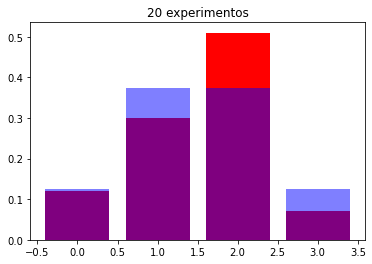

In [27]:
plot_hist(20)

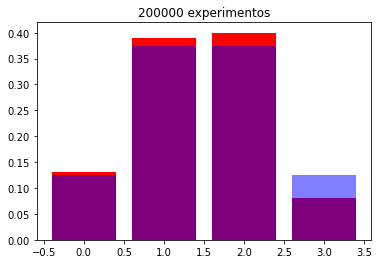

In [28]:
plot_hist(200000)

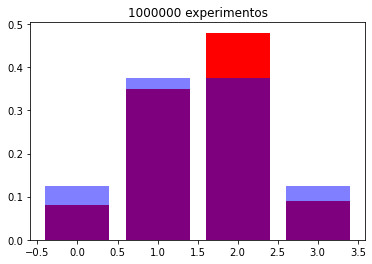

In [29]:
plot_hist(1000000)

# Distribución normal teórica

$$
P(X)=\frac{1}{\sigma\sqrt{2\pi}}\exp-\frac{1}{2}\left( \frac{X-\mu}{\sigma}\right)^2
$$

- $\mu$: media de la distribución
- $\sigma$: desviación estandar de la distribución


In [32]:
def gaussian(x,mu,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow(x-mu/sigma,2))

In [38]:
x = np.arange(-4,4,0.1)
y = gaussian(x,0.0,1.0)

In [39]:
x

array([-4.00000000e+00, -3.90000000e+00, -3.80000000e+00, -3.70000000e+00,
       -3.60000000e+00, -3.50000000e+00, -3.40000000e+00, -3.30000000e+00,
       -3.20000000e+00, -3.10000000e+00, -3.00000000e+00, -2.90000000e+00,
       -2.80000000e+00, -2.70000000e+00, -2.60000000e+00, -2.50000000e+00,
       -2.40000000e+00, -2.30000000e+00, -2.20000000e+00, -2.10000000e+00,
       -2.00000000e+00, -1.90000000e+00, -1.80000000e+00, -1.70000000e+00,
       -1.60000000e+00, -1.50000000e+00, -1.40000000e+00, -1.30000000e+00,
       -1.20000000e+00, -1.10000000e+00, -1.00000000e+00, -9.00000000e-01,
       -8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
        3.55271368e-15,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
        8.00000000e-01,  9.00000000e-01,  1.00000000e+00,  1.10000000e+00,
        1.20000000e+00,  

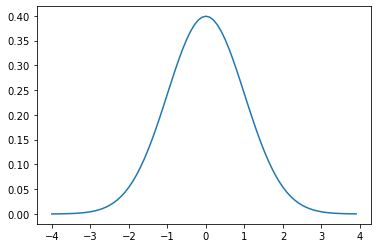

In [34]:
plt.plot(x,y);

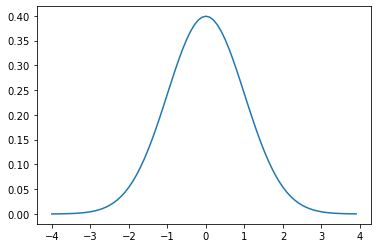

In [40]:
# Utilizando scipy

dist = norm(0,1)
x = np.arange(-4,4,0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x,y);

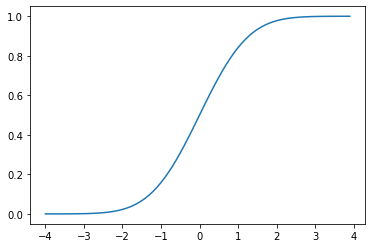

In [42]:
dist = norm(0,1)
x = np.arange(-4,4,0.1)
y = [dist.cdf(value) for value in x]
plt.plot(x,y);

# Distribución Normal (Gaussiana) a partir de datos

In [3]:
df = pd.read_excel('s057.xls')
df.head()

,Normally Distributed Housefly Wing Lengths,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Sokal, R.R., and P.E.Hunter. 1955.",NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,length (x.1mm),NaN,NaN,NaN
3,36,NaN,Bin,Frequency
4,37,NaN,36-38,2


In [4]:
df['Normally Distributed Housefly Wing Lengths'].values

array(['Sokal, R.R., and P.E.Hunter. 1955. ', nan, 'length (x.1mm)', 36,
       37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42,
       42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44,
       44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47,
       48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50,
       50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55],
      dtype=object)

In [5]:
arr = df['Normally Distributed Housefly Wing Lengths'].values[3:]

In [10]:
#Unique hace un conteo único para cada valor en un array
#Por lo que a contiene los valores y b la frecuencia con la
#Que aparecen en el array anterior
a,b = np.unique(arr, return_counts = True)

In [11]:
a,b

(array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55], dtype=object),
 array([ 1,  1,  2,  2,  4,  6,  7,  8,  9, 10, 10,  9,  8,  7,  6,  4,  2,
         2,  1,  1]))

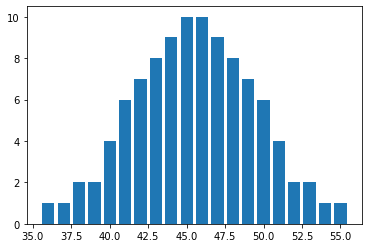

In [58]:
plt.bar(a,b);

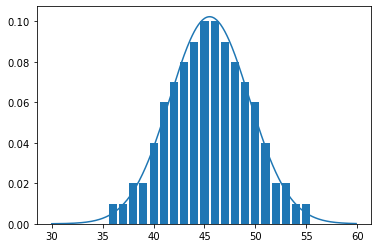

In [60]:
# Estimación de una distribución
#Estimacioń paramétrica

mu = arr.mean()
sigma = arr.std()
x = np.arange(30,60,0.1)
dist = norm(mu,sigma)
y = [dist.pdf(value) for value in x]
plt.plot(x,y)
plt.bar(a,b/len(arr))
plt.show()

# ¿Cómo estimar una distribución?

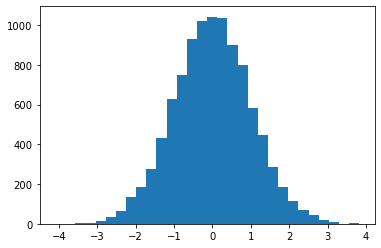

In [13]:
sample = normal(size= 10000) #Generador
plt.hist(sample, bins=30);

In [14]:
sample

array([-0.0675355 ,  0.81398881, -0.21910115, ...,  1.07733783,
       -0.3792466 , -1.46952953])

# Estimacion paramétrica

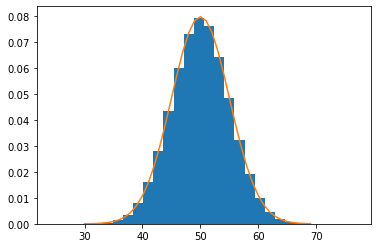

In [19]:
sample = normal(loc = 50, scale = 5, size = 10000000) #mu = 50,  sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu,sigma)
values = [value for value in range(30,70)]
probabilidades = [dist.pdf(value) for value in values]
plt.hist(sample, bins=30, density=True)
plt.plot(values,probabilidades)
plt.show()

# Estimación no paramétrica


Kernel density stimation
- parámetro de suavizado
- base función



In [21]:
from sklearn.neighbors import KernelDensity
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
kde.score_samples(X)
np.array([-0.41075698, -0.41075698, -0.41076071, -0.41075698, -0.41075698,
       -0.41076071])

array([-0.41075698, -0.41075698, -0.41076071, -0.41075698, -0.41075698,
       -0.41076071])

In [26]:
from sklearn.neighbors import KernelDensity
from numpy import hstack
import numpy as np

#Construimos una distribución bimodal
sample1= normal(loc=20,scale=5,size=300)
sample2= normal(loc=40,scale=5,size=700)
sample = hstack((sample1,sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample),1))
model.fit(sample)

KernelDensity(bandwidth=2)

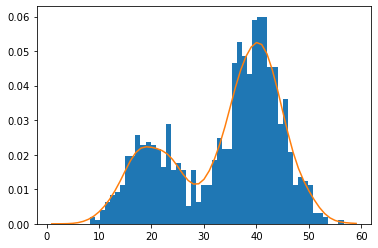

In [28]:
values = np.asarray([value for value in range(1,60)])
values = values.reshape(len(values),1)
probabilities = model.score_samples(values) #Probabilidad algoritmica
probabilities = np.exp(probabilities)       #Inversión de probabilidad

plt.hist(sample,bins=50, density=60)
plt.plot(values,probabilities)
plt.show()

## MLE como base para la regresión logística

 Consideramos el problema de MLE: 

$$
\max \sum_i \log P(y_i \vert x_i; h)
$$

donde:

$y_i$: clase o categoría de cada elemento y $x_i$: son los atributos de cada elemento, donde además cada elemento del dataset satisface una distribución de Bernoulli: 

$$
P = \begin{cases}
p,
& \mbox{si $y=1$,}\\
1-p, & \mbox{si $y=0$.} 
\end{cases} 
$$

En este caso la verosimilitud está dada por: 

$$
L = \hat{y}y+(1-\hat{y})(1-y)  
$$

Esta función da como resultado probabilidades altas cuando $\hat{y} \sim y$.

/tmp/ipykernel_16809/2581436831.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


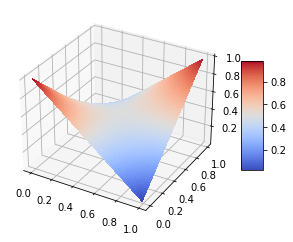

In [5]:
def likelihood(y, yp):
  return yp*y+(1-yp)*(1-y)

fig = plt.figure()
ax = fig.gca(projection='3d')

Y = np.arange(0, 1, 0.01)
YP = np.arange(0, 1, 0.01)
Y, YP = np.meshgrid(Y, YP)
Z = likelihood(Y, YP)

surf = ax.plot_surface(Y, YP, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Considerando $p \rightarrow \log(p)$, y sumando la verosimilitud para todos los puntos del dataset obtenemos: 

$$
max{\sum_i \left(y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)} \\
= \min - \sum_i \left( y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)
$$

que es la conocida función de costo para clasificación conocida como Cross-entropy. 

## Regresión logística con Scikit-learn

Recordemos que:

$$
\hat{y} = \frac{1}{1+\exp{(-\text{log-odds})}}
$$

donde $\text{log-odds} = \beta_0 + \beta_1 x_1 + \dots \beta_n x_n$ y los betas son los parámetros del modelo.

Aplicaremos un ejercicio de clasificación simple con el dataset Iris: 
* https://en.wikipedia.org/wiki/Iris_flower_data_set
* https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [9]:
atrib_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X, y = load_iris(return_X_y=True)

In [10]:
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [14]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
clf = LogisticRegression(random_state=10, solver='liblinear').fit(X[:100],y[:100])

In [17]:
clf.coef_

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])